<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/PandasIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Analysis Workshop
## Data Analysis Pandas Tutorial

This Notebook is to briefly describe the use of the Pandas Library in Data Analysis.

[Reference to Tutorial notes in Github](https://github.com/clizarraga-UAD7/Workshops/wiki/Pandas-for-Data-Analysis)


(Updated: 03/16/2022)


In [54]:
# Loading Python Libraries used in this example
# We continue using Numpy and Matplotlib and start including Pandas

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

# SHIFT+ENTER to run the code cell


## Tips at a restaurant dataset.


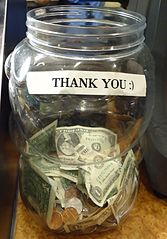

In [3]:
# Using read_csv function to read tips.csv datafile from a Github Repository
# For other file formats search in Google how to read from Pandas ... (Excel, JSON, )
# The file is clean and well structured. No surprises ...

file_name = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/tips.csv"
df = pd.read_csv(file_name)

# print head of datafile to see what we should expect
# By default Jupyter NB prints only 1 output
print('Head: \n', df.head()) 
print('Tail: \n', df.tail())



Head: 
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Tail: 
      total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


- By default the *df.head()* function shows the first 5 rows. 

- If we wanted the first 10 rows we would write *df.head(10)*  

- The df dataframe shows it has 7 columns (variables). 

- The first sequence of numbers appearing at the left is just the row index number in the dataframe.

 (Remember: Python starts counting from zero)

- Similarly the function *df.tail()* exists. It show the last 5 rows of a dataframe, and adding a number *n*, will show the last n rows of the dataframe.

In [ ]:
# We ask about the datafile information

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Obtained **tips.csv** content information using *df.info()*.

It is seen that the **tips.csv** file has 244 entries (rows) and 7 data columns. 

The names of the columns can be appreciated. 
- There are 2 variables being floating numbers of 64 bits (totall_bill and tip amounts), 
- the size of party variable is an integer of 64 bits and 
- the other 4 variables: sex (Male, Female), smoker (Yes, No), day (Mon-Sun)  and time (Lunch, Dinner) are objects.


In [ ]:
# Perform a statistical analysis of the numeric variables of the dataframe

df.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The *describe* function returns for each calumn (variable):
- count: number of data
- mean: arithmetic mean
- std: the standard deviation
- min: the minimum value of the variable
- 25%: first quartile
- 50%: the median value
- 75%: the third quartile
- max: the maximum value of the variable

In [ ]:
# We now apply the describe function to categorical variables

df[ ['sex','smoker','day','time']].describe()


,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


The results can be interpreted as follows:
- unique: 2 values of gendre, 2 values of Smoker, 4 values of Days, 2 times per day.
- Most frequent: Male (157), non Smoker (151), Saturdays (87), Dinner (176).


## Exercise 1 Solution.

**Exercise 1:**

Using the tips dataset, can you please answer the following questions?
- Percentwise, in average who tips the most: Smokers or Nonsmokers?
- What day and at what time tips in average are most generous?

We start with the first question.


In [ ]:
# Reminder what the tips dataframe looks like.

df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Create new column: Percent of Tip relative to Bill amount

df['tip%'] = df['tip']/df['total_bill']

df.head()


,total_bill,tip,sex,smoker,day,time,size,tip%
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [ ]:
# Select rows by condition 
# Find maximum of dif['tip%] if smoker or nonsmoker

print('Max tip% by smoker class')
print('Smoker:', 
      df['tip%'][df['smoker']=='Yes'].max() # Selects rows where df['smoker'] == 'Yes' is True.
      ) 
print('Nonsmoker:', 
      df['tip%'][df['smoker']=='No'].max() # Selects rows where df['smoker'] == 'No' is True.
#     df['tip%'][df['smoker']=='No'].max() # Selects rows where df['smoker'] != 'Yes' is True (Not equal to Yes, which is No). 
      )

# Notice the indentations. 


Max tip% by smoker class
Smoker: 0.710344827586207
Nonsmoker: 0.29198966408268734


In [ ]:
# We can ask for the statistical properties of smokers distibution

df['tip%'][df['smoker']=='Yes'].describe()


count    93.000000
mean      0.163196
std       0.085119
min       0.035638
25%       0.106771
50%       0.153846
75%       0.195059
max       0.710345
Name: tip%, dtype: float64

In [ ]:
# Notice that the describe function returns 8 values. So, the max value is the 8th element. 

max_tip_percent = df['tip%'][df['smoker']=='Yes'].describe()[7]

print('Max Tip:', max_tip_percent)


Max Tip: 0.710344827586207


In [ ]:
# Next we can find when was this:
df[df['tip%'] == max_tip_percent]
 

,total_bill,tip,sex,smoker,day,time,size,tip%
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [ ]:
# Now, just the absolute maximum tip in the dataset can be found in a similar way

max_tip = df['tip'].describe()[7]

# When?

df[df['tip'] == max_tip] 


,total_bill,tip,sex,smoker,day,time,size,tip%
170,50.81,10.0,Male,Yes,Sat,Dinner,3,0.196812


So, there was a smoker on a Sunday Dinner who gave a \$5.15 tip on a \$7.25 bill. 

The maximum tip was \$ 10.00 in a \$ 50.81 bill on a Saturday Dinner. 

**Next question**, in average what day and what time tips are more generous?.


Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


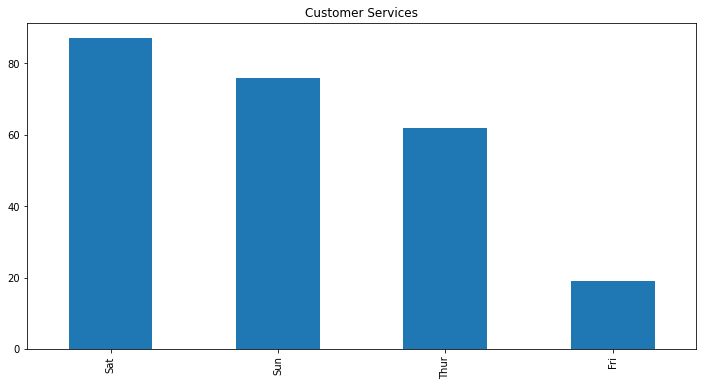

In [4]:
 # Explore more...
 
 print(df['day'].value_counts()) # How many Lunch and Dinner events

 # Make a plot of frequncies 
 df['day'].value_counts().plot(kind='bar', figsize=(12, 6), title='Customer Services');


In [ ]:
# Show services by day of week and time

print(df[['day', 'time']].value_counts())


day   time  
Sat   Dinner    87
Sun   Dinner    76
Thur  Lunch     61
Fri   Dinner    12
      Lunch      7
Thur  Dinner     1
dtype: int64


There are no data for Lunch on Sat & Sun. Thur & Fri they have both times of day.

In [ ]:
# We create two lists. One for days and one for times

day_list = {'Sat', 'Sun', 'Thur', 'Fri'}
time_list = {'Lunch', 'Dinner'}

# We can use nested loops to print average tips for specific day and time

for i_day in day_list:                            # Outer loop
  for i_time in time_list:                        # Inner loop
    print(
        i_day, ',', 
        i_time, ', Average tip: ', 
        df['tip'][(df['day'] == i_day) & (df['time'] == i_time)].mean()
        )

# This is for printing a single event 
#  df['tip'][(df['day'] == 'Sat') & (df['time'] == 'Dinner')].mean()


Sat , Lunch , Average tip:  nan
Sat , Dinner , Average tip:  2.993103448275862
Thur , Lunch , Average tip:  2.7677049180327873
Thur , Dinner , Average tip:  3.0
Sun , Lunch , Average tip:  nan
Sun , Dinner , Average tip:  3.255131578947369
Fri , Lunch , Average tip:  2.382857142857143
Fri , Dinner , Average tip:  2.94


So, the best tips in average happen on Sunday Dinners.

## Number of cyclists per day at Montreal bike paths 
(dataset in French)

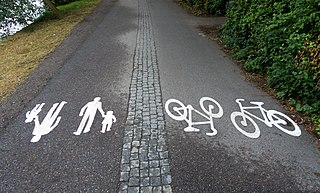

In [5]:
# Read the bike file from a Github repository
# Read URL from raw content of dataset

file_name = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/comptagevelo2012.csv"

df_orig = pd.read_csv(file_name)

# Inquiry beginning/end of the datafile
print('Head: \n', df_orig.head(8))
print('Tail: \n', df_orig.tail(8))


Head: 
          Date Unnamed: 1  Rachel / Papineau  Berri1  Maisonneuve_2  \
0  01/01/2012      00:00                 16      35             51   
1  02/01/2012      00:00                 43      83            153   
2  03/01/2012      00:00                 58     135            248   
3  04/01/2012      00:00                 61     144            318   
4  05/01/2012      00:00                 95     197            330   
5  06/01/2012      00:00                 75     146            244   
6  07/01/2012      00:00                 54      98            108   
7  08/01/2012      00:00                 63      95             98   

   Maisonneuve_1  Brébeuf  Parc  PierDup  CSC (Côte Sainte-Catherine)  \
0             38      5.0    26       10                            0   
1             68     11.0    53        6                            1   
2            104      2.0    89        3                            2   
3            116      2.0   111        8                            1

In [6]:
# Show column names 

df_orig.columns

Index(['Date', 'Unnamed: 1', 'Rachel / Papineau', 'Berri1', 'Maisonneuve_2',
       'Maisonneuve_1', 'Brébeuf', 'Parc', 'PierDup',
       'CSC (Côte Sainte-Catherine)', 'Pont_Jacques_Cartier'],
      dtype='object')

In [7]:
# Show the dataframe general information

df_orig.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         366 non-null    object 
 1   Unnamed: 1                   366 non-null    object 
 2   Rachel / Papineau            366 non-null    int64  
 3   Berri1                       366 non-null    int64  
 4   Maisonneuve_2                366 non-null    int64  
 5   Maisonneuve_1                366 non-null    int64  
 6   Brébeuf                      146 non-null    float64
 7   Parc                         366 non-null    int64  
 8   PierDup                      366 non-null    int64  
 9   CSC (Côte Sainte-Catherine)  366 non-null    int64  
 10  Pont_Jacques_Cartier         317 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 31.6+ KB


We notice the following issues:

- We have a time series, since every row corresponds to a date/time, even if Pandas has not detected this, because of the french date/time format.
- There are 366 rows and 11 columns (streets)
- Column 1 has no name.
- Column 6 and 10, have missing data, compared with the rest
- Column 0 and 1, Pandas does not recognize that one is a Date (DD/MM/YYYY) variable and the other is a time stamp (HH:MM)
- Some cyclist column counts are read as integers (int64) and two as decimal (float64).

The data are not clean. There are missing numbers (NaN - Not a Number), and the Dates do not follow a US time format (YYYY-MM-DD)

We will fix some reading errors by including some arguments in the *pd.read_csv()* function

The latin1 (Extended ASCII) encoding will be used to 

In [8]:
# We will change Date format, being day first in the French date format, also use Date as index of the dataframe

fixed_df = pd.read_csv(file_name, parse_dates=['Date'], dayfirst=True, index_col='Date')

# Print the head of the file
fixed_df.head(10)


,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0
2012-01-06,00:00,75,146,244,98,4.0,86,4,0,17.0
2012-01-07,00:00,54,98,108,80,5.0,53,6,2,9.0
2012-01-08,00:00,63,95,98,62,13.0,64,11,1,23.0
2012-01-09,00:00,173,244,432,165,9.0,198,12,2,23.0


In [9]:
# Extract the dataframe general information

fixed_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2012-01-01 to 2012-12-31
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 1                   366 non-null    object 
 1   Rachel / Papineau            366 non-null    int64  
 2   Berri1                       366 non-null    int64  
 3   Maisonneuve_2                366 non-null    int64  
 4   Maisonneuve_1                366 non-null    int64  
 5   Brébeuf                      146 non-null    float64
 6   Parc                         366 non-null    int64  
 7   PierDup                      366 non-null    int64  
 8   CSC (Côte Sainte-Catherine)  366 non-null    int64  
 9   Pont_Jacques_Cartier         317 non-null    float64
dtypes: float64(2), int64(7), object(1)
memory usage: 31.5+ KB


We have 10 columns (variables), since the Date is now being used as the row index of the dataset (DatetimeIndex).

Now we have a time series formally. 

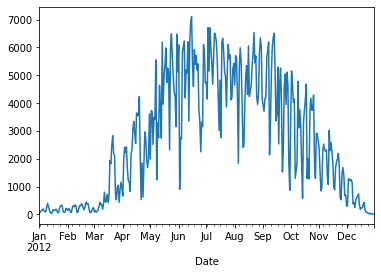

In [10]:
# Now we can plot any column (time series), corresponding to the number of cyclists in a specific bike route.

fixed_df['Berri1'].plot()



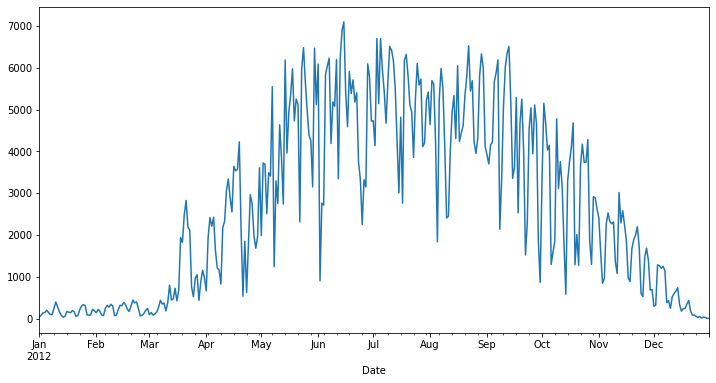

In [11]:
# Make the plot larger 

fixed_df['Berri1'].plot(figsize=(12, 6))


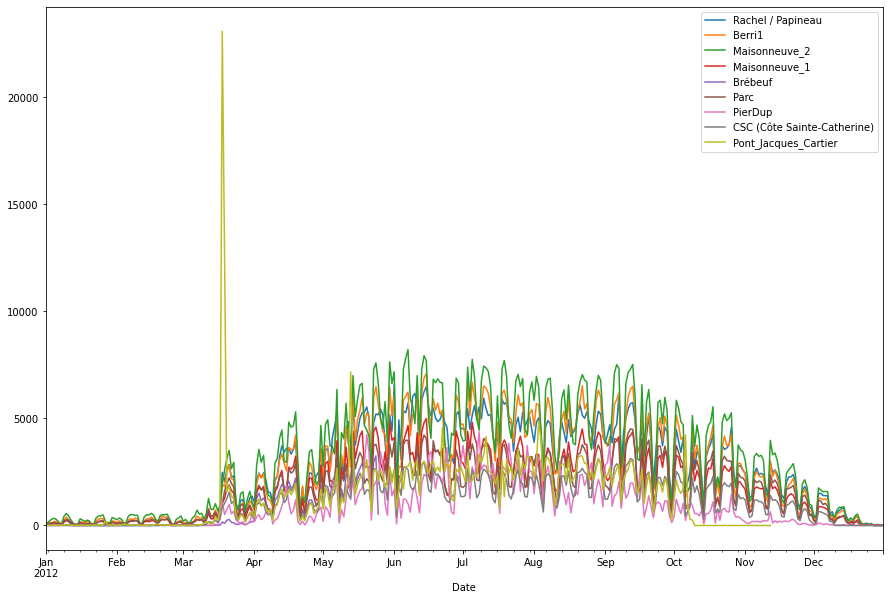

In [12]:
# We can plot all bike routes simultaneously

fixed_df.plot(figsize=(15, 10))


There seems to be coinciding days of small traffic in all routes. Also it appears we have some outlier data in the middle of March (need to justify or exclude). 

In [13]:
# Will analyze only one bike route: Berri1
# We define a new dataframe, making a copy of the original

berri_bikes = fixed_df[['Berri1']].copy()

berri_bikes.head()


,Berri1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


## Working with Dates-Time variables

Pandas has a set of different functions for working with dates.

In [17]:
# We will work with trying to figure out what day of the week is when tere are more cyclists
# Will apply some parsing function to the index-variable Date.

berri_bikes.index


NameError: ignored

In [18]:
# We can filter day from Date

berri_bikes.index.day


NameError: ignored

In [ ]:
# We would be interested in extracting weekday from Date

berri_bikes.index.weekday


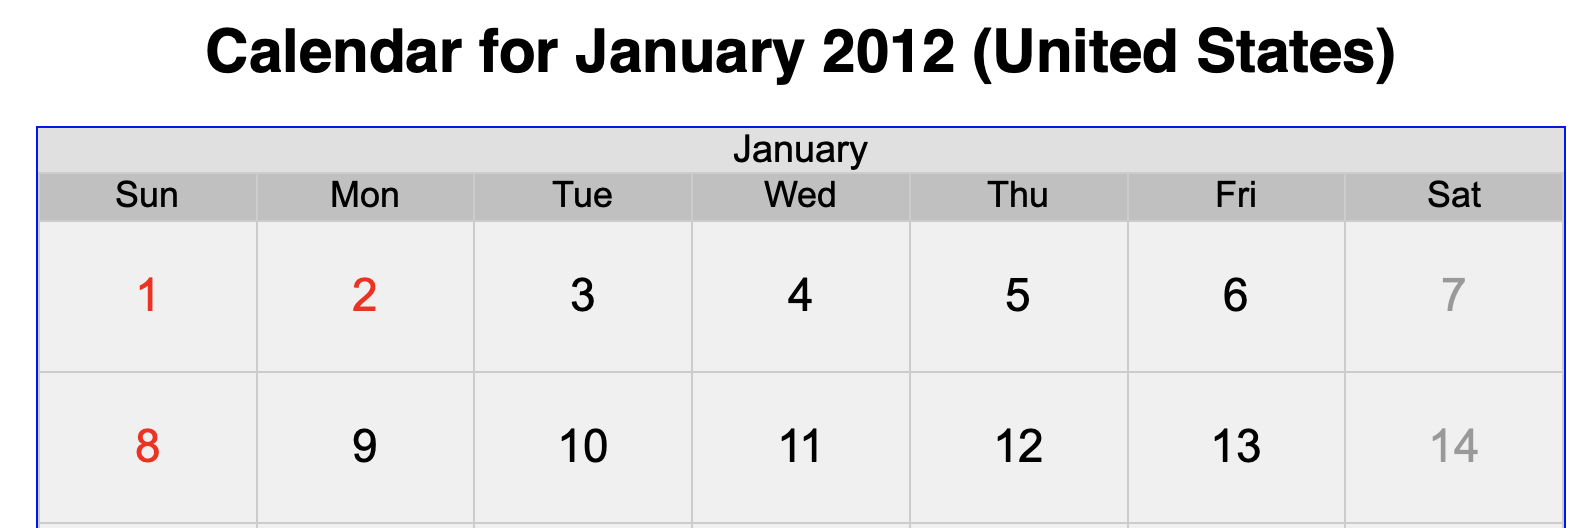

According to the above calendar for 2012, Sunday is day 6, Monday is day 0, Tuesday is day 1, Wednesday is day 2, ..., Saturday day 5.



In [ ]:
# We will add a new column with Weekday to berri_bikes, extracting
# the information with the weekday function operating on index. 

berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes.head()


Will use the function [.groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), so compose a new function *berri_bikes.groupby('weekday').aggregate(sum)*, which means "Group the rows by weekday and then add up all the values with the same weekday".


In [ ]:
# We get the number of cyclists per weekday in Berri1 bike route.

weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts


In [ ]:
# Since its harder to remember which day of the week is what index, we redefine the indexes

weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts


In [ ]:
# We plot this result

weekday_counts.plot(kind='bar', figsize=(12, 6), title='Montreal cyclists on Berri 1')


Resulting that there are more cyclists during the weekdays than the wekends. Thursdays and Wednesdays being the busiest.

**Exercise 2:** Can you find which bike route is the busiest on Thursdays? 


In [ ]:
# We gather all the code for a single bike route

file_name = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/comptagevelo2012.csv"

bikes = pd.read_csv(file_name, 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar' , figsize=(12, 6), title='Montreal cyclists on Berri 1')


In [ ]:
bikes.columns


In [ ]:
bikes.columns[0]

In [ ]:
bikes.index

In [ ]:
bikes.head()

In [ ]:
# Remove column name 'Unnamed: 1', and redefine the bikes dataframe. 
# The axis = 1 refers to columns, and the inplace=True option rewrites the bike dataframe

bikes.drop(['Unnamed: 1'], axis = 1, inplace = True)

bikes.head()


In [ ]:
# Add the weekday column

bikes_new = bikes.copy()
bikes_new.loc[:,'weekday'] = bikes.index.weekday

bikes_new.head()


In [ ]:
bikes_new.columns


In [ ]:
# Establish a route counter. There are 9 bike routes. 
for i in range(0,9):
  print('Route:', i)

# Sum the number of cyclists by weekday, and plot!
# bikes_new.iloc[:,[i,9]].groupby('weekday') contains column route and weekday and groups them by weekday
  weekday_counts = bikes_new.iloc[:,[i,9]].groupby('weekday').aggregate(sum)
# The weekday is set as index of the weekday_counts dataframe  
  weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

  print('Max:', weekday_counts.max())  # Print the maximum for ever column or route case
  weekday_counts.plot(kind='bar' , figsize=(12, 6), title="Cyclists per weekday during 2012")  # Do a bar plot for every case.



From the data found, we can clearly see that Maisonneuve_2 is the most busy bike route, with Thursdays being the busiest biking day (210,039 users in year 2012)

## Analizing Historic Climate Data

We can analize 2012 historic climate data downloaded from https://download.synopticdata.com for the UofA. 

This example will require more preprocessing of the data before we can use it. Pandas has all the tools for helping in this stage. 

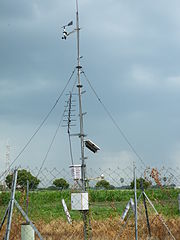


We study Tucson International Airport historical weather data file. 

 
*   The first 10 lines have general information about the station at the Airport (will ignore).
*   Line 11 has the variable names (dataframe column names).
*   Line 12 has units information (will neglect)
*   Weather data appears from line 13 till the end of the file (line 642,936).
*   The file begins contains hourly weather data, and ends with 5 minutes weather data.  



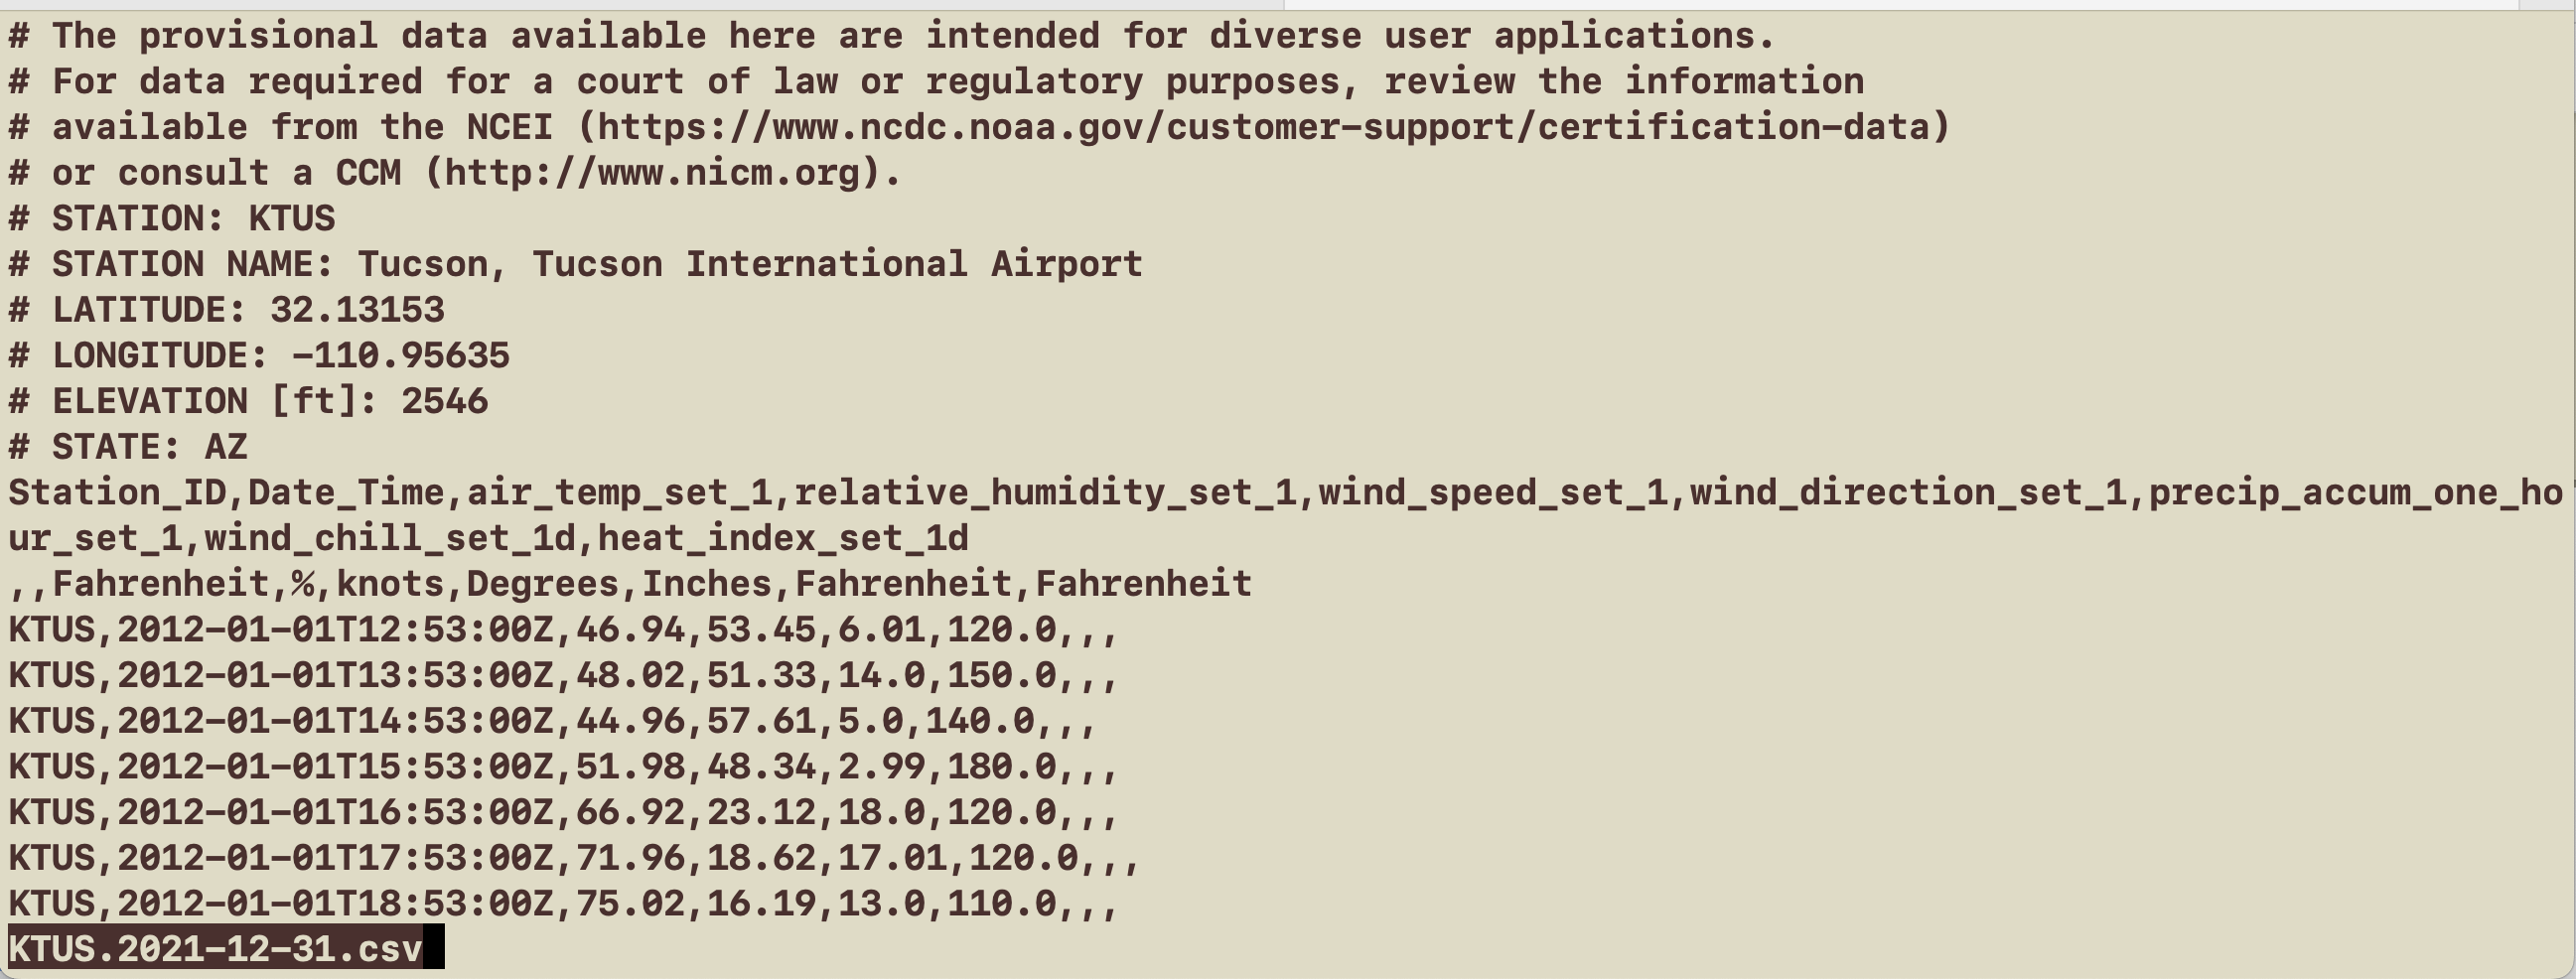

In [24]:
# Read file for Tucson International Airport historic data

# The URL of the raw data in Github Datasets Repository.

# Tucson International Airport (1 year of data)
#filename = 'https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/KTUS.2020-12-31.csv'

# UA 2012 (1 year of data)
#filename='https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/SA46.2012-12-31.csv'

# Tucson International Airport (10 ys of data)
filename="https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/KTUS.2021-12-31.csv"

# Read the future column names, on line 11 (Skip 10 rows and read only 1 row)
row_names = pd.read_csv(filename, skiprows=10, header=None, nrows=1)
# Convert row to a list of column names
col_names = list(row_names.loc[0])

# Read the weather data starting on row 13, and assign column names read on previous command.  
df_climate = pd.read_csv(filename, skiprows=12, header=None, names=col_names)

# Print the beginning of file
df_climate.head()


,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,precip_accum_one_hour_set_1,wind_chill_set_1d,heat_index_set_1d
0,KTUS,2012-01-01T12:53:00Z,46.94,53.45,6.01,120.0,NaN,NaN,NaN
1,KTUS,2012-01-01T13:53:00Z,48.02,51.33,14.00,150.0,NaN,NaN,NaN
2,KTUS,2012-01-01T14:53:00Z,44.96,57.61,5.00,140.0,NaN,NaN,NaN
3,KTUS,2012-01-01T15:53:00Z,51.98,48.34,2.99,180.0,NaN,NaN,NaN
4,KTUS,2012-01-01T16:53:00Z,66.92,23.12,18.00,120.0,NaN,NaN,NaN


In [25]:
# Print last 5 rows of dataframe

df_climate.tail()


,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,precip_accum_one_hour_set_1,wind_chill_set_1d,heat_index_set_1d
642919,KTUS,2021-12-31T11:45:00Z,48.20,100.00,6.0,270.0,0.07,NaN,NaN
642920,KTUS,2021-12-31T11:50:00Z,48.20,100.00,4.0,280.0,0.08,NaN,NaN
642921,KTUS,2021-12-31T11:53:00Z,48.92,96.69,3.0,300.0,0.09,NaN,NaN
642922,KTUS,2021-12-31T11:55:00Z,48.20,100.00,5.0,300.0,0.01,NaN,NaN
642923,KTUS,2021-12-31T12:00:00Z,48.20,100.00,4.0,320.0,NaN,NaN,NaN


In [26]:
# We search for general dataframe info

df_climate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642924 entries, 0 to 642923
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Station_ID                   642924 non-null  object 
 1   Date_Time                    642924 non-null  object 
 2   air_temp_set_1               640255 non-null  float64
 3   relative_humidity_set_1      640225 non-null  float64
 4   wind_speed_set_1             626935 non-null  float64
 5   wind_direction_set_1         622228 non-null  float64
 6   precip_accum_one_hour_set_1  10837 non-null   float64
 7   wind_chill_set_1d            3476 non-null    float64
 8   heat_index_set_1d            230241 non-null  float64
dtypes: float64(7), object(2)
memory usage: 44.1+ MB


We observe that Pandas has not recognized a Date/Time variable. It is an unidentified object. The rest of numeric variables are recognized as 64 bits floating numbers (decimal).

Will use the pandas function *pd.to_datetime* for parsing dates, if we know the Date/Time format of original file.

Date_Time comes in format: 2012-01-01T12:30:00Z
which is "%Y-%m-%DT%H:%M:%SZ", where 
* %Y is 4 digits Year, 
* %m is 2 digits month
* %D is 2 digits Day
* %H is 24 hour format
* %M is 60 minutes format
* %S is 60 seconds format

The original Data_Time included a T separator between data and time and a Zulu time zone Z (UTC +0). 

Also, we can observe that the 'sea_level_pressure_set_1' column in empty. It has 0 values. We will drop this colummn and also drop the 'Station_ID' since we know what station it is.



In [27]:

# Applying the pandas to_datetime function, we redefine a new DateTime column. 

df_climate['DateTime']= pd.to_datetime(df_climate_orig["Date_Time"], format="%Y-%m-%dT%H:%M:%SZ")


df_climate.head()



,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,precip_accum_one_hour_set_1,wind_chill_set_1d,heat_index_set_1d,DateTime
0,KTUS,2012-01-01T12:53:00Z,46.94,53.45,6.01,120.0,NaN,NaN,NaN,2012-01-01 12:53:00
1,KTUS,2012-01-01T13:53:00Z,48.02,51.33,14.00,150.0,NaN,NaN,NaN,2012-01-01 13:53:00
2,KTUS,2012-01-01T14:53:00Z,44.96,57.61,5.00,140.0,NaN,NaN,NaN,2012-01-01 14:53:00
3,KTUS,2012-01-01T15:53:00Z,51.98,48.34,2.99,180.0,NaN,NaN,NaN,2012-01-01 15:53:00
4,KTUS,2012-01-01T16:53:00Z,66.92,23.12,18.00,120.0,NaN,NaN,NaN,2012-01-01 16:53:00


In [28]:
# We now check the dataframe to see the variable DateTime...

df_climate_orig.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642924 entries, 0 to 642923
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Station_ID                   642924 non-null  object        
 1   Date_Time                    642924 non-null  object        
 2   air_temp_set_1               640255 non-null  float64       
 3   relative_humidity_set_1      640225 non-null  float64       
 4   wind_speed_set_1             626935 non-null  float64       
 5   wind_direction_set_1         622228 non-null  float64       
 6   precip_accum_one_hour_set_1  10837 non-null   float64       
 7   wind_chill_set_1d            3476 non-null    float64       
 8   heat_index_set_1d            230241 non-null  float64       
 9   DateTime                     642924 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 49.1+ MB


In [29]:
# We get the general statistics for the weather data for Tucson International Airport.

df_climate.describe()


,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,precip_accum_one_hour_set_1,wind_chill_set_1d,heat_index_set_1d
count,640255.000000,640225.000000,626935.000000,622228.000000,10837.000000,3476.000000,230241.000000
mean,72.081343,33.979633,6.317673,177.610296,0.053416,37.971974,87.440496
std,16.784522,21.575692,3.984191,99.061955,0.109277,3.613153,6.266841
min,17.960000,0.060000,0.000000,0.000000,0.000000,23.450000,77.850000
25%,59.000000,16.910000,4.000000,130.000000,0.010000,36.440000,82.280000
50%,73.400000,28.720000,6.010000,160.000000,0.020000,39.350000,86.130000
75%,84.200000,47.060000,8.010000,260.000000,0.050000,40.770000,91.740000
max,114.980000,100.000000,46.000000,360.000000,1.300000,41.910000,109.920000


In [30]:
# We proceed to eliminate unnecessary columns (optional)

df_climate.head()


,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,precip_accum_one_hour_set_1,wind_chill_set_1d,heat_index_set_1d,DateTime
0,KTUS,2012-01-01T12:53:00Z,46.94,53.45,6.01,120.0,NaN,NaN,NaN,2012-01-01 12:53:00
1,KTUS,2012-01-01T13:53:00Z,48.02,51.33,14.00,150.0,NaN,NaN,NaN,2012-01-01 13:53:00
2,KTUS,2012-01-01T14:53:00Z,44.96,57.61,5.00,140.0,NaN,NaN,NaN,2012-01-01 14:53:00
3,KTUS,2012-01-01T15:53:00Z,51.98,48.34,2.99,180.0,NaN,NaN,NaN,2012-01-01 15:53:00
4,KTUS,2012-01-01T16:53:00Z,66.92,23.12,18.00,120.0,NaN,NaN,NaN,2012-01-01 16:53:00


In [42]:
# Here we will some cleaning and reorganizing data
# Eliminating non-useful columns Station_ID and old Date_Time 
# Work with new copy fo df_climate in case we need to come back

df_climate_new = df_climate.copy()
df_climate_new = df_climate_new.drop(['Station_ID', 'Date_Time'], axis=1)

# Renaming column names
df_climate_new.rename(columns={'air_temp_set_1' : 'Temp',
                   'relative_humidity_set_1' : 'RH',
                   'wind_speed_set_1' : 'Wind', 
                   'wind_direction_set_1' : 'WindDir',
                   'precip_accum_one_hour_set_1' : 'Precip',
                   'wind_chill_set_1d' : 'WindChill',
                   'heat_index_set_1d' : 'HeatIndex', 
                    'DateTime' : 'Date'}, inplace=True)

# Print the new cleaned and reorganized dataframe
df_climate_new.head()


,Temp,RH,Wind,WindDir,Precip,WindChill,HeatIndex,Date
0,46.94,53.45,6.01,120.0,NaN,NaN,NaN,2012-01-01 12:53:00
1,48.02,51.33,14.00,150.0,NaN,NaN,NaN,2012-01-01 13:53:00
2,44.96,57.61,5.00,140.0,NaN,NaN,NaN,2012-01-01 14:53:00
3,51.98,48.34,2.99,180.0,NaN,NaN,NaN,2012-01-01 15:53:00
4,66.92,23.12,18.00,120.0,NaN,NaN,NaN,2012-01-01 16:53:00


In [43]:
# Dataframe statistical properties
df_climate_new.describe()


,Temp,RH,Wind,WindDir,Precip,WindChill,HeatIndex
count,640255.000000,640225.000000,626935.000000,622228.000000,10837.000000,3476.000000,230241.000000
mean,72.081343,33.979633,6.317673,177.610296,0.053416,37.971974,87.440496
std,16.784522,21.575692,3.984191,99.061955,0.109277,3.613153,6.266841
min,17.960000,0.060000,0.000000,0.000000,0.000000,23.450000,77.850000
25%,59.000000,16.910000,4.000000,130.000000,0.010000,36.440000,82.280000
50%,73.400000,28.720000,6.010000,160.000000,0.020000,39.350000,86.130000
75%,84.200000,47.060000,8.010000,260.000000,0.050000,40.770000,91.740000
max,114.980000,100.000000,46.000000,360.000000,1.300000,41.910000,109.920000


In [44]:
# Set the new DateTime as index, so we can apply different time functions to select data

df_climate_new = df_climate_new.set_index('Date')

# Print the new dataset with Date as an Index (head & tail)
print('Head: \n', df_climate_new.head())
print('\n Tail: \n', df_climate_new.tail())


Head: 
                       Temp     RH   Wind  WindDir  Precip  WindChill  \
Date                                                                   
2012-01-01 12:53:00  46.94  53.45   6.01    120.0     NaN        NaN   
2012-01-01 13:53:00  48.02  51.33  14.00    150.0     NaN        NaN   
2012-01-01 14:53:00  44.96  57.61   5.00    140.0     NaN        NaN   
2012-01-01 15:53:00  51.98  48.34   2.99    180.0     NaN        NaN   
2012-01-01 16:53:00  66.92  23.12  18.00    120.0     NaN        NaN   

                     HeatIndex  
Date                            
2012-01-01 12:53:00        NaN  
2012-01-01 13:53:00        NaN  
2012-01-01 14:53:00        NaN  
2012-01-01 15:53:00        NaN  
2012-01-01 16:53:00        NaN  

 Tail: 
                       Temp      RH  Wind  WindDir  Precip  WindChill  \
Date                                                                   
2021-12-31 11:45:00  48.20  100.00   6.0    270.0    0.07        NaN   
2021-12-31 11:50:00  48.20  10

In [46]:
# Now create a new column extracting the 'month' from the Date index

df_monthly = df_climate_new.copy()

df_monthly.loc[:,'month'] = df_monthly.index.month

df_monthly.head()


,Temp,RH,Wind,WindDir,Precip,WindChill,HeatIndex,month
Date,,,,,,,,
2012-01-01 12:53:00,46.94,53.45,6.01,120.0,NaN,NaN,NaN,1
2012-01-01 13:53:00,48.02,51.33,14.00,150.0,NaN,NaN,NaN,1
2012-01-01 14:53:00,44.96,57.61,5.00,140.0,NaN,NaN,NaN,1
2012-01-01 15:53:00,51.98,48.34,2.99,180.0,NaN,NaN,NaN,1
2012-01-01 16:53:00,66.92,23.12,18.00,120.0,NaN,NaN,NaN,1


In [51]:
# Compute the total precipitation per month per year
df_monthly_mean = df_monthly.groupby('month').mean()

df_monthly_mean.head(12)


,Temp,RH,Wind,WindDir,Precip,WindChill,HeatIndex
month,,,,,,,
1,53.215052,45.018790,5.754734,162.397364,0.032723,37.110294,78.814000
2,55.947464,39.629799,6.134869,179.975166,0.030352,37.926066,79.725977
3,62.801460,31.801147,6.509218,185.983175,0.028937,38.572960,80.899156
4,71.450249,19.816792,6.717764,196.134215,0.019106,40.780000,82.192773
5,77.926084,17.949175,6.852097,195.791567,0.060559,NaN,84.391743
6,88.606827,17.672919,6.678554,195.984164,0.045180,NaN,88.806297
7,88.377788,40.183271,6.593945,181.836978,0.091917,NaN,90.362749
8,87.155739,41.864767,6.188706,174.751565,0.068303,NaN,89.659487
9,82.796799,38.452545,6.308678,170.849640,0.054234,NaN,87.357711


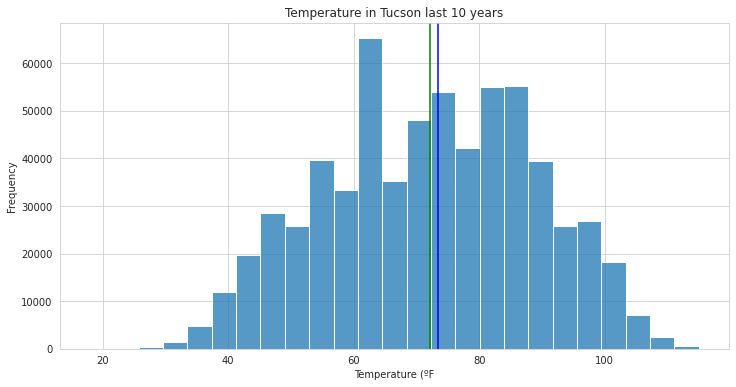

In [71]:
# Using Seaborn to plot Temperature Frequency in Tucson

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

plt.xlabel('Temperature (ºF')
plt.ylabel('Frequency')
plt.title('Temperature in Tucson last 10 years')

# Define Median and Mean Temperature
Tmed = df_monthly.Temp.median() 
Tmean = df_monthly.Temp.mean()

# Vertical lines for defining Median and Mean Temperatures
plt.axvline(x = Tmed, color = 'b', label = 'med') 
plt.axvline(x = Tmean, color = 'g', label = 'mean')

sns.histplot(data=df_monthly.Temp, bins=25);



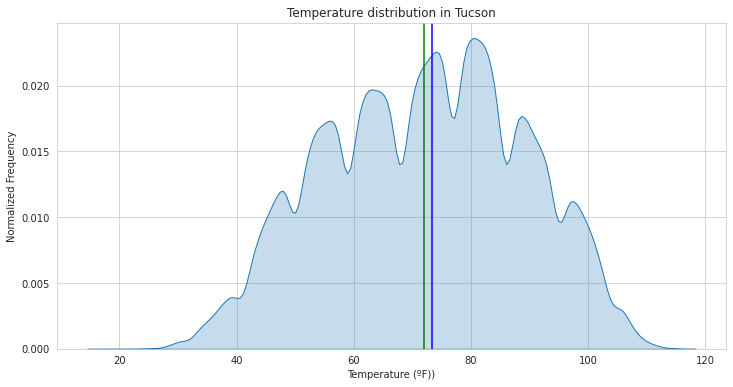

In [106]:
# KDE (Kernel Density Estimate)
# Probability Density Function
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.kdeplot(data=df_monthly.Temp, fill=True);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tmean, color = 'g');

plt.xlabel('Temperature (ºF))')
plt.ylabel('Normalized Frequency')
plt.title('Temperature distribution in Tucson')

plt.show()


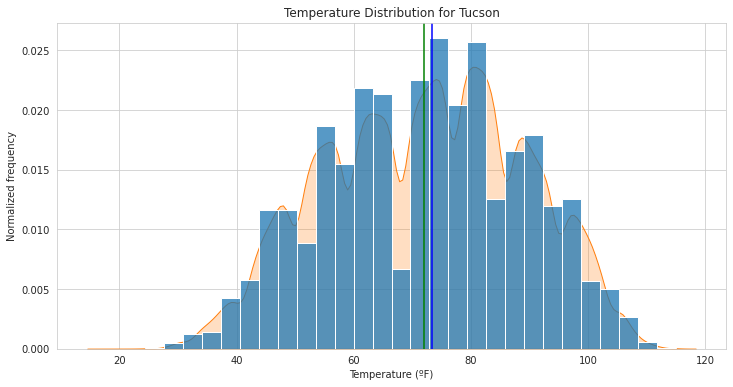

In [73]:
# A superposition of both plots
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.histplot(data=df_monthly.Temp, bins=30, stat='density');
sns.kdeplot(data=df_monthly.Temp, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tmean, color = 'g');

plt.xlabel('Temperature (ºF)')
plt.ylabel('Normalized frequency')
plt.title('Temperature Distribution for Tucson')

plt.show()


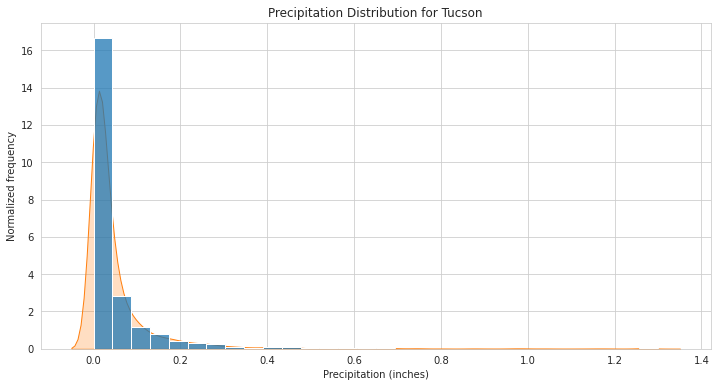

In [107]:
# A superposition of both plots
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.histplot(data=df_monthly.Precip, bins=30, stat='density');
sns.kdeplot(data=df_monthly.Precip, fill=True);

#plt.axvline(Tmed, color = 'b'); 
#plt.axvline(Tmean, color = 'g');

plt.xlabel('Precipitation (inches)')
plt.ylabel('Normalized frequency')
plt.title('Precipitation Distribution for Tucson')

plt.show()


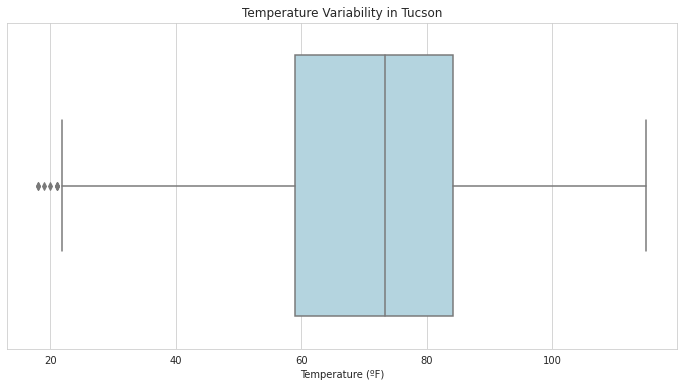

In [83]:
# BoxPlots using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.boxplot(x=df_monthly.Temp, data=df_monthly, orient='h', color='lightblue').set(xlabel='Temperature (ºF)', 
                                                     title='Temperature Variability in Tucson');


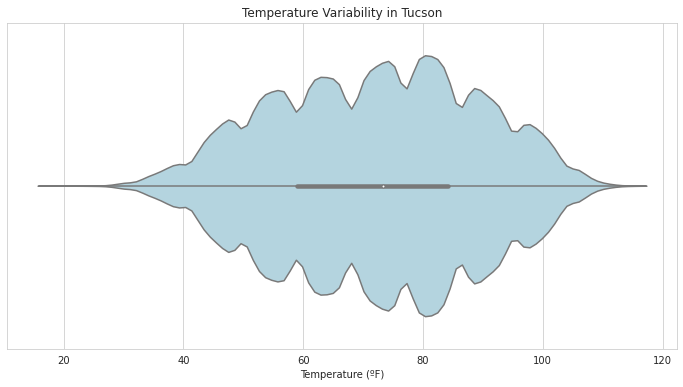

In [89]:
# BoxPlots using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

ax = sns.violinplot(x=df_monthly.Temp, data=df_monthly, orient='h', color='lightblue').set(xlabel='Temperature (ºF)', 
                                                     title='Temperature Variability in Tucson')
                                                     


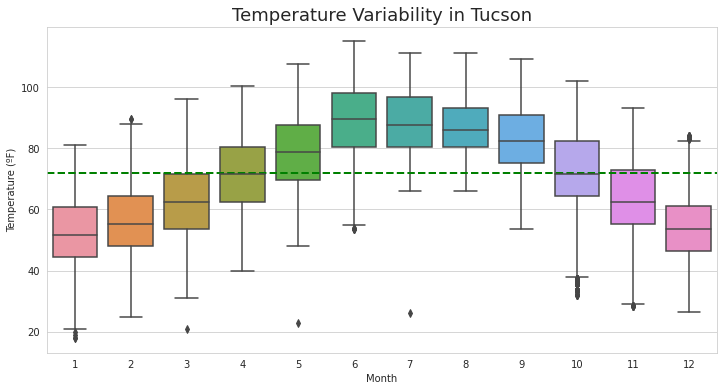

Tucson's mean Temp =  72.08 ºF


In [116]:
# Monthy Temperature
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))

# Average Temperature
Tmean = df_monthly.Temp.mean()

# Monthy Temperature Variability Boxplot 
g = sns.boxplot(x='month', y='Temp', data=df_monthly);

# Mean temperature line

plt.axhline(Tmean, color = 'g', linestyle='--', linewidth=2);

plt.xlabel('Month')
plt.ylabel('Temperature (ºF)')
plt.title('Temperature Variability in Tucson', fontsize=18)


plt.show()

# Mean Temp
print("Tucson's mean Temp = ", round(Tmean,2),'ºF')


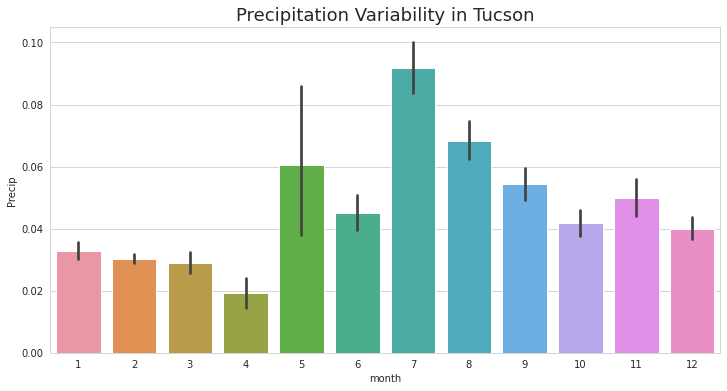

In [118]:
# Tucson's Monthly Precipitation 
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

plt.title('Precipitation Variability in Tucson', fontsize=18)
g=sns.barplot(x='month', y='Precip', data=df_monthly);


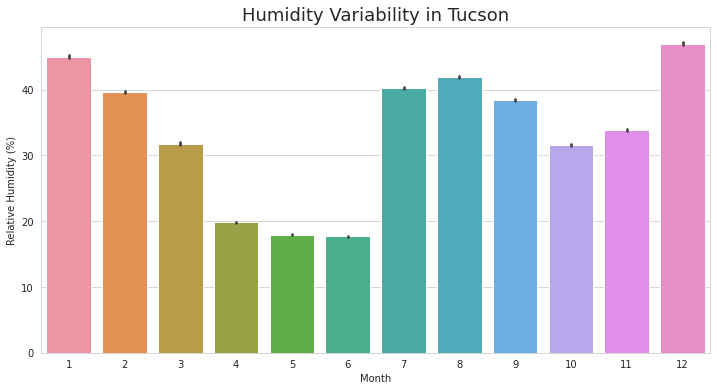

In [117]:
# Monthy Humidity
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))


# Monthy Relative Humidity Variability Boxplot 
g = sns.barplot(x='month', y='RH', data=df_monthly);

plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')
plt.title('Humidity Variability in Tucson', fontsize=18)


plt.show()

